In [83]:
import pandas as  pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [84]:
data=pd.read_csv('/content/House price.csv')

In [85]:
data.head(10)

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,Suburban,1295,5,1,2007,5,61023
1,Urban,1163,1,3,1961,1,216619
2,Urban,2020,1,2,1983,5,168012
3,Suburban,1279,2,1,2004,1,206542
4,Urban,2268,1,1,1961,2,316979
5,Urban,3072,2,2,1988,5,418501
6,Rural,1979,2,3,1982,5,433934
7,Rural,2353,3,3,1975,3,172402
8,Urban,1636,4,2,1957,4,215421
9,Urban,1520,2,2,1965,2,325987


In [86]:
data.isnull().sum()


,0
Location,0
Size (sqft),0
Bedrooms,0
Bathrooms,0
Year Built,0
Condition,0
Price,0


In [87]:
le=LabelEncoder()
data["Location"]=le.fit_transform(data["Location"])

In [88]:
mn=StandardScaler()
num_data=["Size (sqft)","Bedrooms","Bathrooms" ,"Year Built","Condition","Price"]
data[num_data]=mn.fit_transform(data[num_data])

In [89]:
data.describe()

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.020000,2.913225e-16,9.769963e-17,4.618528e-17,2.664535e-16,-6.394885e-17,3.907985e-17
std,0.815024,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,0.000000,-1.981435e+00,-1.235625e+00,-1.231835e+00,-1.653187e+00,-1.397988e+00,-1.753604e+00
25%,0.000000,-7.506603e-01,-1.235625e+00,-1.231835e+00,-9.442932e-01,-7.344908e-01,-8.496542e-01
50%,1.000000,-5.631023e-02,2.468285e-01,1.244278e-02,-9.362118e-02,-7.099414e-02,2.055840e-01
75%,2.000000,8.142377e-01,9.880552e-01,1.256721e+00,8.988295e-01,1.255999e+00,8.298837e-01
max,2.000000,1.780063e+00,1.729282e+00,1.256721e+00,1.607723e+00,1.255999e+00,1.654605e+00


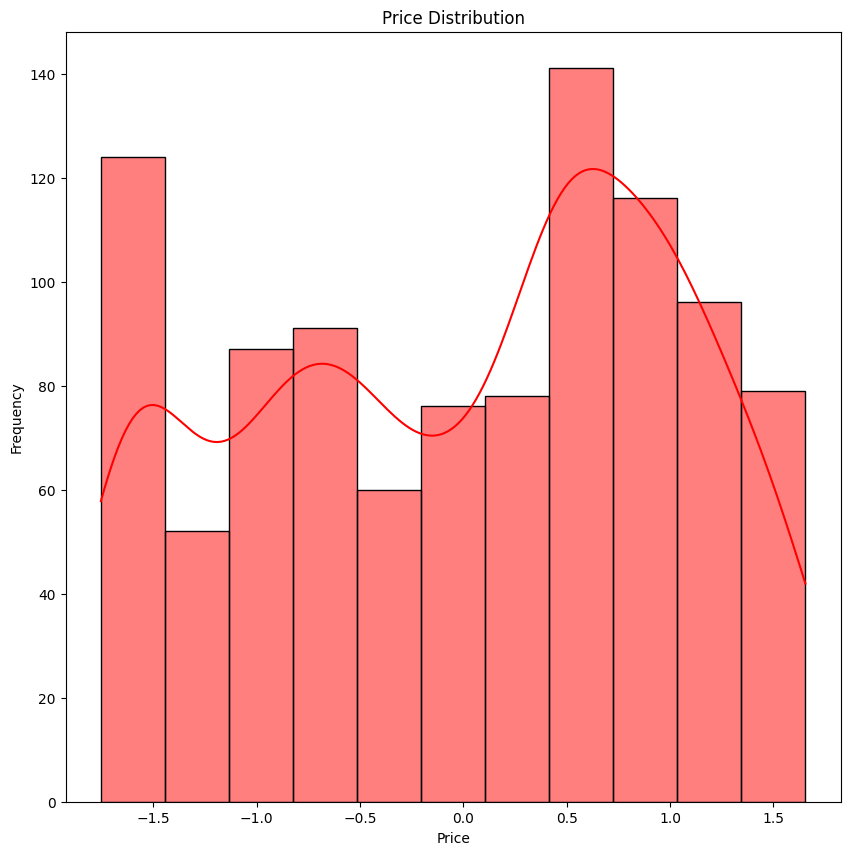

In [90]:
plt.figure(figsize=(10,10))
sns.histplot(data["Price"],kde=True,color="Red")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


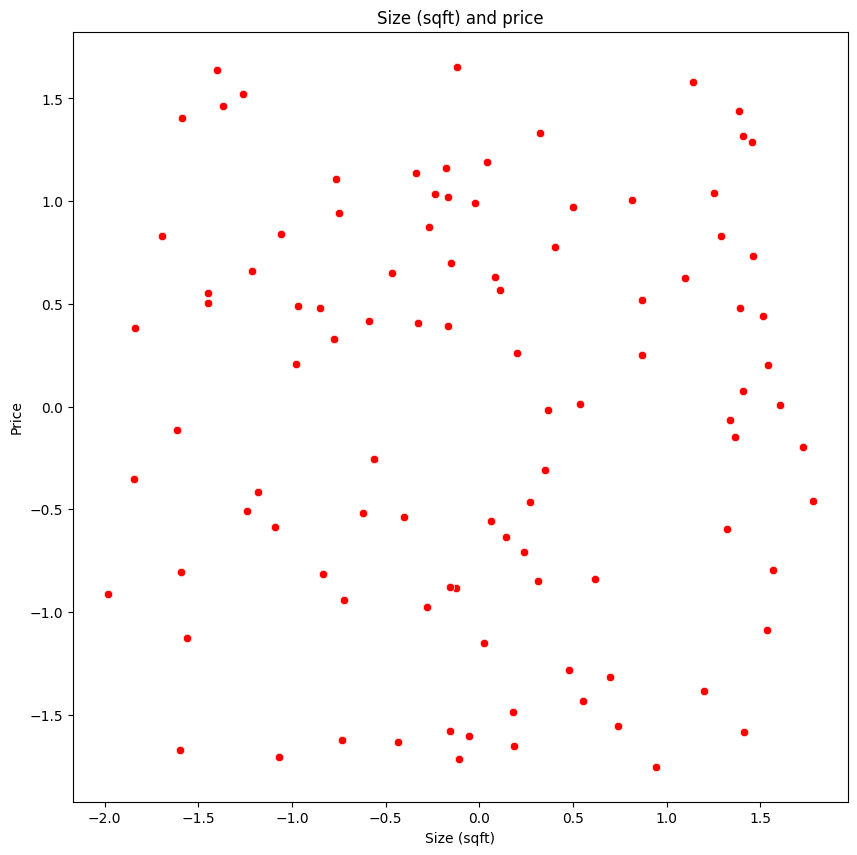

In [91]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data["Size (sqft)"],y=data["Price"],data=data,color="Red")
plt.title("Size (sqft) and price")
plt.xlabel("Size (sqft)")
plt.ylabel("Price")
plt.show()


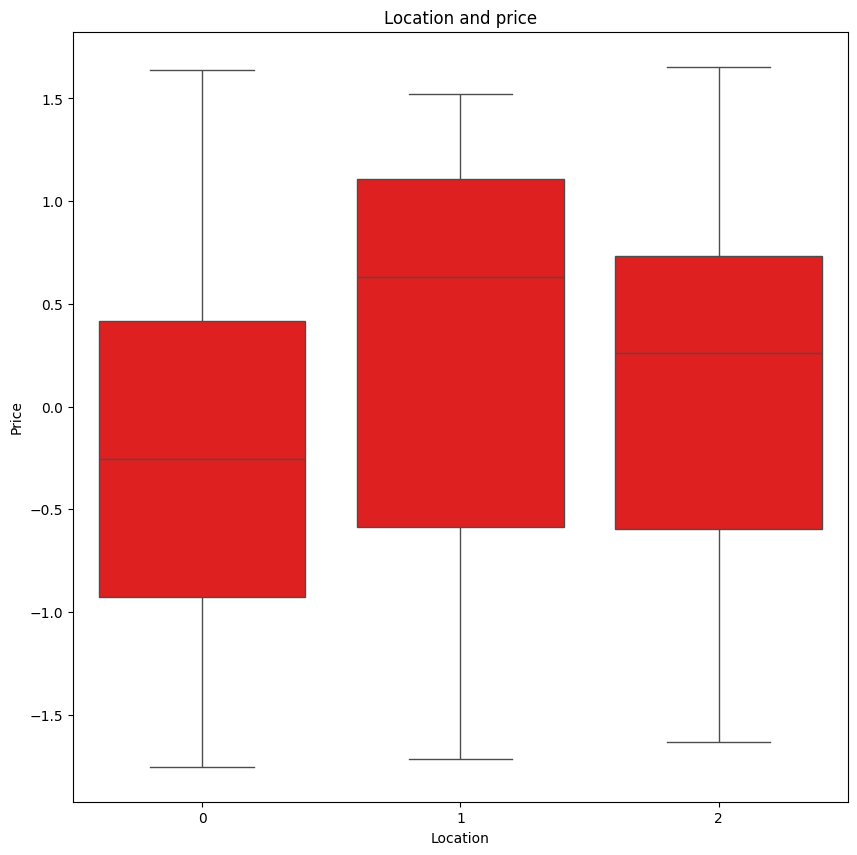

In [92]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data["Location"],y=data["Price"],data=data,color="Red")
plt.title("Location and price")
plt.xlabel("Location")
plt.ylabel("Price")
plt.show()

In [93]:
x=data.drop("Price",axis=1)
y=data["Price"]

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [95]:
rf=RandomForestRegressor(n_estimators=100,max_depth=None)
rf.fit(x_train,y_train)


RandomForestRegressor()

In [96]:
y_pred_rf=rf.predict(x_test)


In [97]:
print("mse:",mean_absolute_error(y_test,y_pred_rf)*100)
print("R2 Score:",r2_score(y_test,y_pred_rf)*100)

mse: 0.4320719129463467
R2 Score: 99.97553448711135


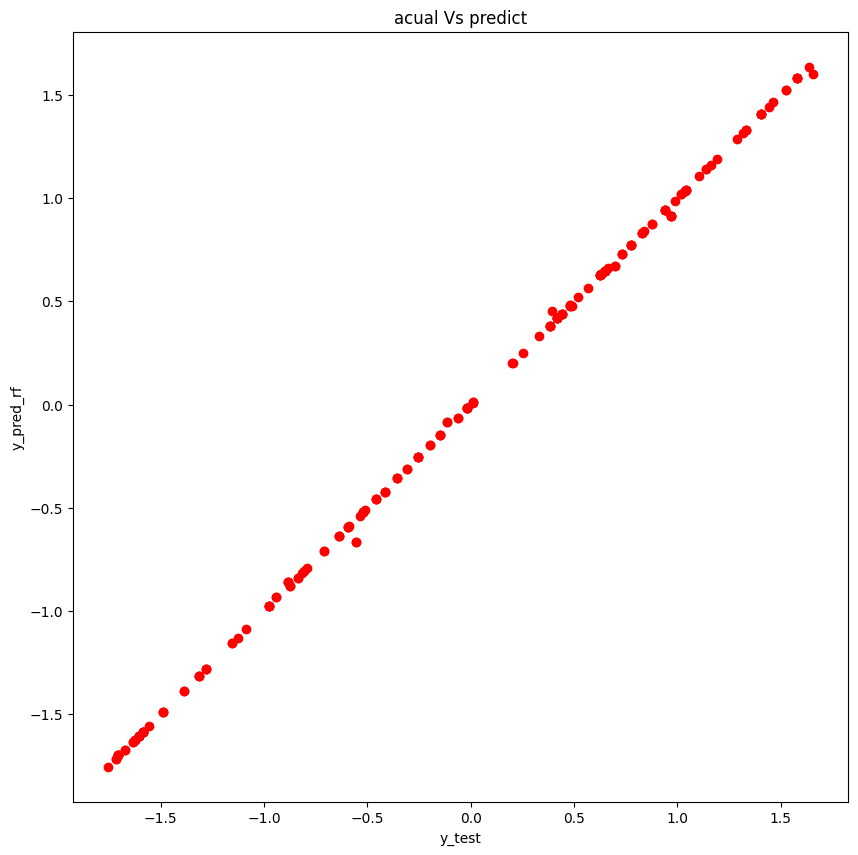

In [98]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=y_pred_rf,color="Red")
plt.title("acual Vs predict")
plt.xlabel("y_test")
plt.ylabel("y_pred_rf")
plt.show()

In [99]:
from sklearn.model_selection import RandomizedSearchCV
rf_pram={"n_estimators":[50,100,200,None],"max_depth":[3,5,10,None]}
Randomized_model=RandomizedSearchCV(RandomForestRegressor(),rf_pram,cv=5)
Randomized_model.fit(x_train,y_train)
prdict_rf=Randomized_model.predict(x_test)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

In [100]:
print("this is for high acuurce",Randomized_model.best_params_)
print("prams for low mse is",mean_absolute_error(y_test,prdict_rf))

this is for high acuurce {'n_estimators': 50, 'max_depth': None}
prams for low mse is 0.003605090186850077


In [101]:



import gradio as gr
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('/content/House price.csv')

le = LabelEncoder()
data["Location"] = le.fit_transform(data["Location"])

mn = StandardScaler()
num_data = ["Size (sqft)", "Bedrooms", "Bathrooms", "Year Built", "Condition", "Price"]
data[num_data] = mn.fit_transform(data[num_data])

x = data.drop("Price", axis=1)
y = data["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=None)
rf.fit(x_train, y_train)

def predict_house_price(size, bedrooms, bathrooms, year_built, condition, location):
    input_data = pd.DataFrame({
        "Size (sqft)": [size],
        "Bedrooms": [bedrooms],
        "Bathrooms": [bathrooms],
        "Year Built": [year_built],
        "Condition": [condition],
        "Location": [location]
    })

    input_data[num_data[:-1]] = mn.transform(input_data[num_data[:-1]])

    predicted_price = rf.predict(input_data)

    return predicted_price[0]

iface = gr.Interface(
    fn=predict_house_price,
    inputs=[
        gr.Number(label="Size (sqft)"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Bathrooms"),
        gr.Number(label="Year Built"),
        gr.Number(label="Condition"),
        gr.Number(label="Location (encoded)")
    ],
    outputs=gr.Textbox(label="Predicted Price"),
    title="House Price Prediction",
    description="Predict the price of a house based on its features."
)

iface.launch()




Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://22fc6236308d0d8fc4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
